#Bonferroni's Principle

###A cautionary tale


**General idea: ** If you run a test enough times and squint hard enough at the data set, you can get it to tell you just about anything.  That doesn't mean it's true!

**Background: ** The expected value of an independent event is generally calculated as:

$$E(x) = \sum_i^{n} x_i p_i$$

   Which for binomial outcomes simplifies to:

$$E(x) = np(x) $$

Intuitively, the number of trials $n$ and the probability of an event $p(x)$ both contribute to the likelihood that you will see an interesting event.  The Bonferroni Principle warns us to tune both the definition of an interesting event ($p(x)$) and the number of trials ($n$) such that the likelihood of flagging true positives is not overpowered by the sheer random probability of our criteria being satisfied.

**Am I in danger of being fooled? ** Assuming the data selection method is random, use your sample size to calculate the expected number of interesting events.  If this number is larger than the number of intuitive events you hope to see, your methods of defining an 'interesting event' may not be stringent enough or you may be testing too many times.  You'll have to cull the set of interesting events further to avoid being flooded with False Positives.

**What can I do? ** You can either use a more hypothesis-driven approach to define the interesting event (i.e. make your criteria more stringent), or attempt to correct your statistical significance estimations using the Bonferroni Correction.

###An example illustrating Bonferroni's Principle

from [Mining of Massive Datasets](http://infolab.stanford.edu/~ullman/mmds/book.pdf), by Leskovec, Rajaraman, Ullman

You are observing hotel visits to try to identify terrorist organization meetings. On average, people visit a hotel 1 in every 100 days.  Each hotel holds 100 people, so we can assume there are 100,000 hotels-- enough to hold 1% of the population each day.  You're examining hotel records over 1000 days.  You define a suspicious duo as people who visited the same hotel at the same time on two occasions.

- Sample size $n_{people}$
- P(hotel visit), given $H_0$: $p_{random}$
- number of hotels: $n_{hotels}$
- number of days observed $t$

Joint probability of two people visiting a hotel on a particular day:

$$ p_{random}^2 = 0.0001 $$

Probability that both people choose the same hotel:

$$\frac{p_{random}^2}{n_{hotels}}  = \frac{0.0001}{10^5} = 10^{-9} $$
    
For the event to be considered interesting, this pair has to visit the same hotel on the same day twice:

$$P(event) = (10^{-9})^2 = 10^{-18}$$

This is the probability of the interesting event occuring, given random chance.  Let's use the formula for expected value and our sample size n to estimate the number of interesting events we should see by random chance.

The number of possible pairs of people is $n_{people}$ choose 2:

$$\frac{n_{people}!}{(n_{people}-2)!~2!} = \frac{10^9!}{(10^9-2)!~2!} = 5 \times 10^{17}$$

And the number of possible pairs of days for them to visit the same hotel:

$$\frac{t!}{(t-2)!~2!} = \frac{1000!}{(1000-2)!~2!} = 5 \times 10^5$$

Therefore, the expected value given random chance can be calculated by multiplying the number of possible people-pairs by the number of possible day-pairs and again by the probability of a people-and-day-pair:

$$(5 \times 10^{17}) \times (5 \times 10^5) \times (10^{-18}) = 250,000$$

Based on the event criteria and the number of trials (1000 days and 1B people), we can expect that random chance alone would qualify a quarter of a million pairs of people to be flagged as terrorists! Clearly, the experiment needs to be redesigned in order to be effective.

##Test it out!

***note: *** This function uses a simplification of the Binomial Coefficient, which holds true for large n:

$$\frac{n!}{(n-2)!~2!} \approx \frac{n^2}{2}$$

In [114]:
from scipy.special import binom

samp= {'s_n_people': 1000000000, 'n_hotels': 100000, 's_n_days':1000}
criteria = {'c_n_people': 2, 'c_n_days': 2}

def expected_events(samp= {'s_n_people': 1000000000, 'n_hotels': 100000, 's_n_days':1000}, criteria = {'c_n_people': 2, 'c_n_days': 2}, p_hotel_random = 0.01):
    # the sample dict includes the number of people, hotels, and days observed.  There is an assumption that the hotels are each big enough to cumulatively hold all people likely to visit a hotel on a given day, given p_hotel_random
    # the criteria dict indicates how many people need to colocate at a hotel, and how many times over the course of observation
    # p_hotel_random is the probability that any given person visits a hotel on a given day
    
    # compute probability that two people visit a hotel on a given day
    p_1 = p_hotel_random**criteria['c_n_people']
    
    # probability that it's the same hotel
    p_2 = p_1/samp['n_hotels']
    
    # probability that it occurs the requisite number of times
    p_criteria_satisfied = p_2**criteria['c_n_days']
    
    # compute the number of possible combinations of people
    c_people = binom(samp['s_n_people'], criteria['c_n_people'])
    
    # compute the number of possible combinations of days
    c_days = binom(samp['s_n_days'], criteria['c_n_days'])
    
    # compute the expected value
    n_random_events = p_criteria_satisfied*c_people*c_days
    
    return int(n_random_events)

In [115]:
expected_events()

249749

In [154]:
def events_curve(samp, criteria, x_variable, x_range, n_bins=10):
    # give a dictionary of samp and criteria values as above
    # this time, specify a variable to change (x_variable) and a range (x_range)
    # also provide 
    x_vars = np.arange(x_range[0], x_range[1], int((x_range[1]-x_range[0])/n_bins))
    y = []
    
    for x in x_vars:
        if x_variable in samp:
            samp[x_variable] = x
            y.append(expected_events(samp, criteria))
        elif x_variable in criteria:
            criteria[x_variable] = x
            y.append(expected_events(samp, criteria))
    
    plot(x_vars, y, 'g-', x_vars, y, 'b^', linewidth = 2)
    xlabel(x_variable)
    ylabel('Expected number of events')
    
    return

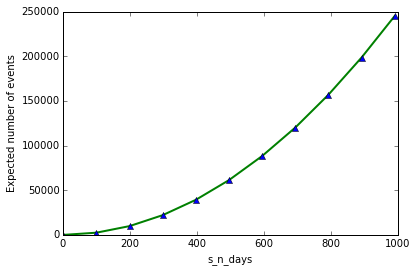

In [155]:
events_curve(samp, criteria, x_variable = 's_n_days', x_range = [1,1000])